# Tarea 3

##Omar Díaz Landa
### 114041

##Usuario: dwh 
Contraseña: mineria08

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

# Lectura de los datos

In [10]:
data = pd.read_csv('regLin.csv')
data.head()

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144


# Separamos la base en muestras de entrenamiento y prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size = 0.3)

print 'X_Train \n', X_train[1:6]
print 'Y_Train \n',y_train[1:6]

X_Train 
[[ 73.50397701]
 [ 69.59710498]
 [ 47.88116843]
 [ 22.13671317]
 [ 88.84923043]]
Y_Train 
[ 48.83517039  50.61496402  36.50221674  15.09137493  56.87804116]


# Ajustamos el modelo


Para ello, primero creamos el objeto de la regresión lineal y despues ajustamos el modelo

In [23]:
reg_lin = LinearRegression()
mod = reg_lin.fit(X_train, y_train)


Obtenemos las betas estimadas


In [24]:
print('Beta_0:')
print mod.intercept_
print ('\n')
print('Beta_1:')
print mod.coef_

Beta_0:
2.4421664045


Beta_1:
[ 0.60879283]


## Evaluamos el modelo

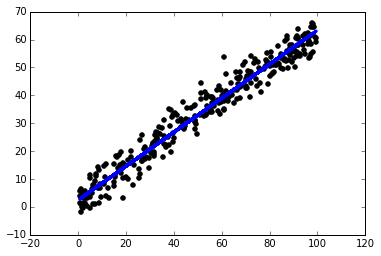

In [25]:
pred = mod.predict(X_test)
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue',linewidth=3)
plt.show()

## Graficamos el error

Creamos la función que nos calcula el error

In [26]:
def err2(w0,w1,x,y):
    return sum((y - w0 - w1*x)**2)

Hacemos un grid para la beta_1

In [44]:
b1 = np.linspace(mod.coef_-2,mod.coef_+2,num=20)
betas1 = pd.DataFrame({'Beta_1':b1})
betas1.head()

,Beta_1
0,-1.391207
1,-1.180681
2,-0.970155
3,-0.759628
4,-0.549102


Calculamos el error para cada valor de beta_1 en el grid

In [49]:
x = np.squeeze(X_train)
F = np.zeros(len(b1))

for i in range(len(b1)):
    F[i] = err2(mod.intercept_,b1[i],x,y_train)
    
betas1['Err2'] = F
betas1.head()

,Beta_1,Err2
0,-1.391207,9303935.678423
1,-1.180681,7450873.056466
2,-0.970155,5803706.281394
3,-0.759628,4362435.353205
4,-0.549102,3127060.271901


Generamos la gráfrica del error, esperamos que sea convexa pues se trata del error cuadrático

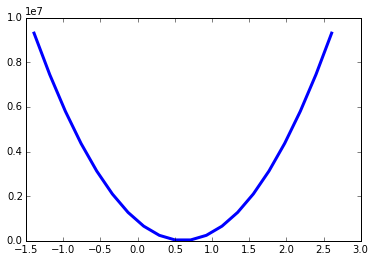

In [52]:
plt.plot(betas1['Beta_1'], betas1['Err2'], color='blue',linewidth=3)
plt.show()